# Thermodynamics of Hydrogen Production

The minimal energy required to produce hydrogen from liquid water is given by the
Higher Heating Value (HHV). The HHV is the sum of the difference
between the enthalpies of products and educts (LHV: Lower Heating Value) and
the Heat of Evaporation for water.

In [1]:
import gaspype as gp

lhv = gp.fluid({'H2': 1, 'O2': 1/2, 'H2O': -1}).get_H(25 + 273.15)
dh_v = 43990  # J/mol  (heat of evaporation for water @ 25 °C)

hhv = lhv + dh_v
print(f'LHV: {lhv/1e3:.1f} kJ/mol')
print(f'HHV: {hhv/1e3:.1f} kJ/mol')

LHV: 241.8 kJ/mol
HHV: 285.8 kJ/mol


Thermodynamics also defines which part of the energy must be
provided as work (e.g., electric power) and which part can be supplied
as heat. This depends on temperature and pressure. For generating 1 bar
of hydrogen the temperature dependency can be calculated as follows:

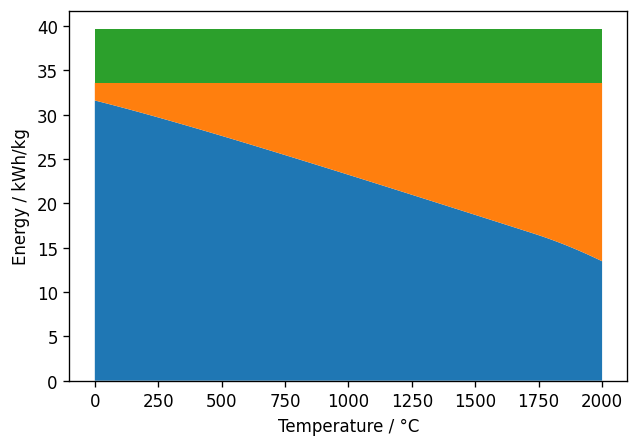

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2000, 128)  # 0 to 2000 °C
p = 1e5  # Pa (=1 bar)

g_products = gp.fluid({'H2': 1, 'O2': 1/2, 'H2O': 0}).get_G(t + 273.15, p)
g_educts =   gp.fluid({'H2': 0, 'O2': 0,   'H2O': 1}).get_G(t + 273.15, p)

work = g_products - g_educts  # J/mol
heat = lhv - work  # J/mol

fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.set_xlabel("Temperature / °C")
ax.set_ylabel("Energy / kWh/kg")
k = 1e-3 / 3600 / 0.002  # Conversion factor from J/mol to kWh/kg for hydrogen
ax.stackplot(t, k * work, k * heat, k * dh_v * np.ones_like(t))

Green is the heat of evaporation, orange the additional heat provided at
the given temperature and blue the work.